In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle
# from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [2]:
dataset = pd.read_csv('dataset.csv')

with open('my_list.pkl', 'rb') as f:
    len_list = pickle.load(f)

In [3]:
np.unique(dataset["punc"])

array([' ', '!', ',', '.'], dtype=object)

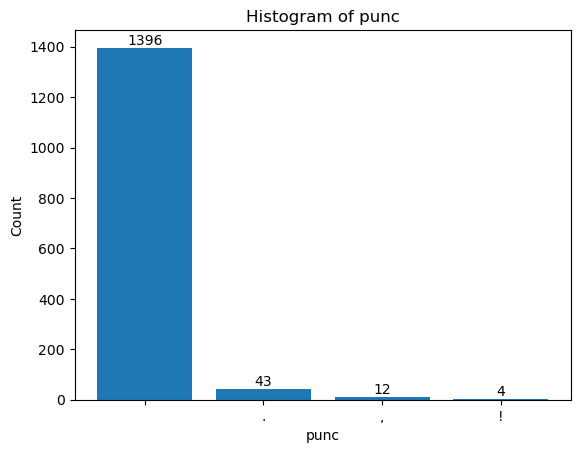

In [4]:
import matplotlib.pyplot as plt

column_name = "punc"
value_counts = dataset[column_name].value_counts()

plt.bar(value_counts.index, value_counts)
plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(f"Histogram of {column_name}")

for i, value in enumerate(value_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

In [5]:
dataset.loc[dataset["punc"] == "!", "punc"] = 1
dataset.loc[dataset["punc"] == ".", "punc"] = 1
dataset.loc[dataset["punc"] == ",", "punc"] = 1
dataset.loc[dataset["punc"] == ";", "punc"] = 1
dataset.loc[dataset["punc"] == " ", "punc"] = 0

In [7]:
dataset

,Time Stamps (s),Values,Labels,punc,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
0,0.535,0.0,M,0,0.160,1.000,0.0,0.0,0.0,0.0
1,0.695,0.0,M,0,0.200,0.160,-1.0,0.0,-5.0,0.0
2,0.895,-1.0,L,0,0.130,0.200,0.0,-1.0,0.0,-5.0
3,1.025,-1.0,L,0,0.230,0.130,0.0,0.0,0.0,0.0
4,1.255,-1.0,L,0,0.120,0.230,1.5,0.0,12.5,0.0
...,...,...,...,...,...,...,...,...,...,...
1450,24.596,-1.0,L,0,0.065,0.155,0.0,0.0,0.0,0.0
1451,24.661,-1.0,L,0,0.205,0.065,0.0,0.0,0.0,0.0
1452,24.866,-1.0,L,0,0.060,0.205,0.0,0.0,0.0,0.0
1453,24.926,-1.0,L,0,0.125,0.060,0.0,0.0,0.0,0.0


In [10]:
X = dataset.drop(columns=["Time Stamps (s)", "Labels","punc"]).values
y = dataset["punc"].values
X,y

(array([[ 0.   ,  0.16 ,  1.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.2  ,  0.16 , ...,  0.   , -5.   ,  0.   ],
        [-1.   ,  0.13 ,  0.2  , ..., -1.   ,  0.   , -5.   ],
        ...,
        [-1.   ,  0.06 ,  0.205, ...,  0.   ,  0.   ,  0.   ],
        [-1.   ,  0.125,  0.06 , ...,  0.   ,  0.   ,  0.   ],
        [-1.   ,  1.   ,  0.125, ...,  0.   ,  0.   ,  0.   ]]),
 array([0, 0, 0, ..., 0, 0, 1], dtype=object))

In [11]:
X_train = X[:(-1)*len_list[-1],:]
y_train = y[:(-1)*len_list[-1]]

X_test = X[(-1)*len_list[-1]:,:]
y_test = y[(-1)*len_list[-1]:]

In [21]:
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = compute_class_weight()

# Initialize a Random Forest classifier with class weights
clf = RandomForestClassifier(class_weight=dict(zip(np.unique(y_train), class_weights)))

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

TypeError: compute_class_weight() missing 2 required keyword-only arguments: 'classes' and 'y'

In [12]:
# Get feature importances
feature_importances = clf.feature_importances_

# Display feature importances
print("\nFeature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

NameError: name 'class_weight' is not defined

In [ ]:
class_weights = {0: 1, 1: 10}
model = RandomForestClassifier(class_weight="balanced")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
data = {
    "Feature": dataset.drop(columns=["Time Stamps (s)", "Labels", "punc"]).columns,
    "Importance": model.feature_importances_
}

feature_importance_df = pd.DataFrame(data)
# Plot the feature importances
plt.figure(figsize=(5, 3))
plt.bar(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.show()